In [6]:
from math import ceil
import matplotlib.pyplot as plt
from numpy import unravel_index

from math import ceil
import matplotlib.pyplot as plt
from numpy import unravel_index


def show_multiple_img(images, targets):
    """
    Visualizza una griglia di immagini con i relativi titoli.
    
    Questa funzione prende in input due liste: una di immagini e una di etichette corrispondenti (targets) e 
    le visualizza in una griglia. Il numero massimo di colonne è fissato a 6; il numero di righe è calcolato 
    in base al numero totale di immagini. Le dimensioni della figura sono adattate in base al numero di colonne e righe.
    
    :param images: Lista di immagini da visualizzare. Ogni elemento della lista è un'immagine che può essere visualizzata con plt.imshow.
    :param targets: Lista di etichette corrispondenti alle immagini. Ogni etichetta è visualizzata come titolo della rispettiva immagine.
    :return: None
    """

    # Determina il numero di colonne (limitato a un massimo di 6) e calcola il numero di righe necessarie.
    if len(images) < 6:
        my_cols = len(images)
    else:
        my_cols = 6
    my_rows = ceil(len(images) / my_cols)  # Calcola il numero di righe necessario.

    # Calcola le dimensioni della figura in base al numero di righe e colonne.
    fig_width = my_cols * 10 / 6  # Adatta la larghezza della figura.
    fig_height = my_rows * 10 / 4  # Adatta l'altezza della figura.

    # Crea la figura con le dimensioni calcolate.
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = fig.add_gridspec(my_rows, my_cols)  # Crea una griglia per le sottofigure.

    axes = []  # Lista per memorizzare gli assi delle sottofigure.
    matrix_dimension = (my_rows, my_cols)  # Dimensione della matrice per posizionare le sottofigure.
    for n, image in enumerate(images):
        subplot_position = unravel_index(n, matrix_dimension)  # Calcola la posizione della sottofigura.
        axes.append(fig.add_subplot(gs[subplot_position]))  # Aggiunge la sottofigura alla griglia.

    # Nasconde gli assi per tutte le sottofigure.
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # Imposta i titoli e mostra le immagini nelle rispettive sottofigure.
    for ax, image, target in zip(axes, images, targets):
        ax.set_title(target)  # Imposta il titolo con l'etichetta corrispondente.
        ax.imshow(image, cmap=plt.cm.gray_r)  # Mostra l'immagine con colormap grigio invertito.
    
    plt.tight_layout()  # Ottimizza la disposizione delle sottofigure.
    plt.show()  # Visualizza la figura.


Importo il dataset che è già dentro a sklearn.datasets

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [8]:
dig = load_digits()

è una funzione che restituisce un dizionario con dei dati

In [9]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
dig.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

- 'feature_names'
- 'target_names'
- 'DECSR' è un testo che ci spiega tutto

In [11]:
print(dig.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Contiene le matrici delle immagini da riconoscere

In [12]:
dig.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

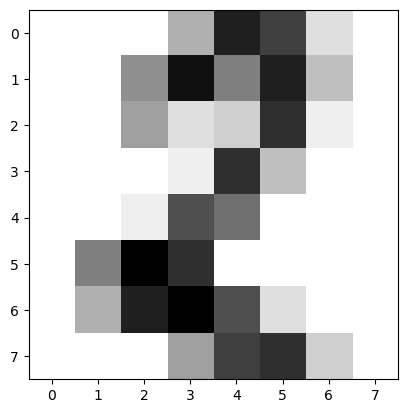

In [13]:
plt.imshow(dig.images[50], cmap=plt.cm.gray_r)

Righe da 64 numeri all'interno

In [14]:
dig.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Target contiene il valore, con index X, che dovrà i

In [15]:
dig.target[50]

2

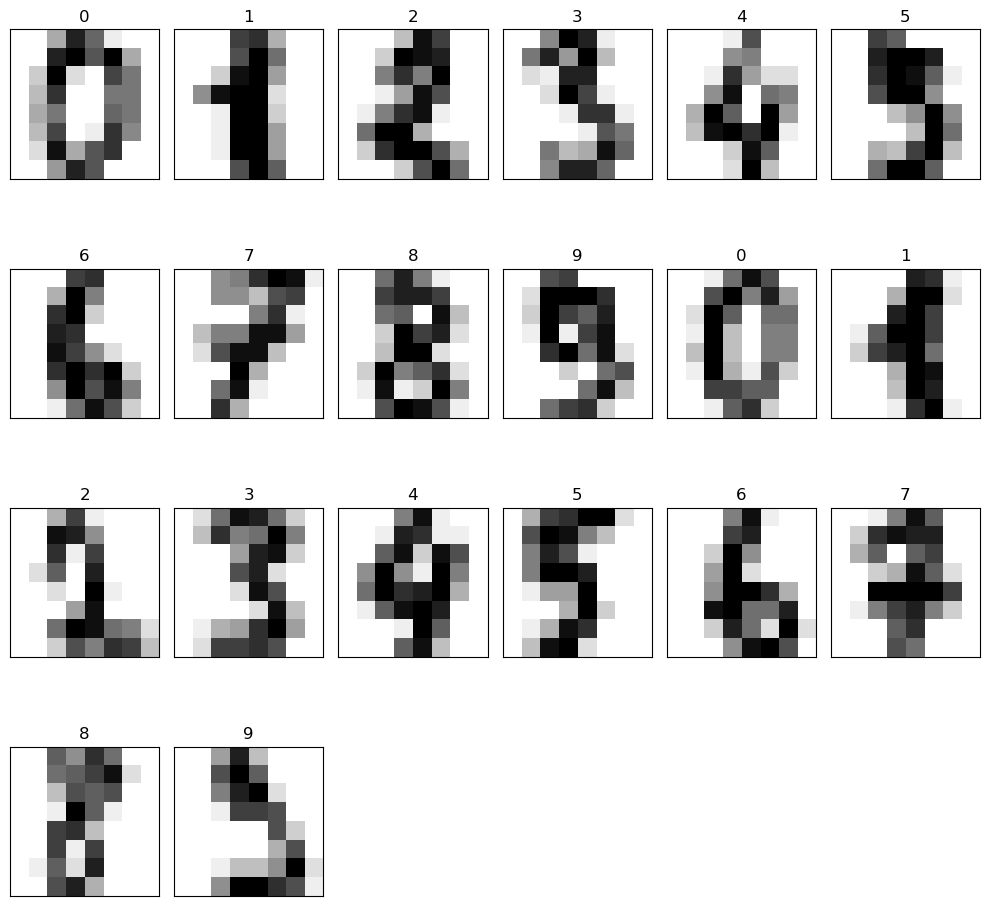

In [17]:
show_multiple_img(dig.images[0:20], dig.target[0:20])